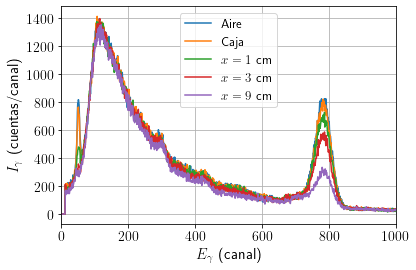

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


plt.rcParams['text.usetex'] = True

data_arena_aire = pd.read_csv('./experimentodensidadrayosgamma/arena_aire.csv')
data_caja_arena_0 = pd.read_csv('./experimentodensidadrayosgamma/caja_arena_0.csv')
data_caja_arena_1 = pd.read_csv('./experimentodensidadrayosgamma/caja_arena_1.csv')
data_caja_arena_3 = pd.read_csv('./experimentodensidadrayosgamma/caja_arena_3.csv')
data_caja_arena_9 = pd.read_csv('./experimentodensidadrayosgamma/caja_arena_9.csv')

plt.plot(data_arena_aire['canal'], data_arena_aire['cuentas'], label='Aire')
plt.plot(data_caja_arena_0['canal'], data_caja_arena_0['cuentas'], label='Caja')
plt.plot(data_caja_arena_1['canal'], data_caja_arena_1['cuentas'], label=r'$x=1$ cm')
plt.plot(data_caja_arena_3['canal'], data_caja_arena_3['cuentas'], label=r'$x=3$ cm')
plt.plot(data_caja_arena_9['canal'], data_caja_arena_9['cuentas'], label=r'$x=9$ cm')
plt.xlim(0, 1000)
plt.xlabel(r'$E_{\gamma}$ (canal)', fontsize=15)
plt.ylabel(r'$I_{\gamma}$ (cuentas/canal)', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=13)
plt.savefig('espectros_arena.pdf')

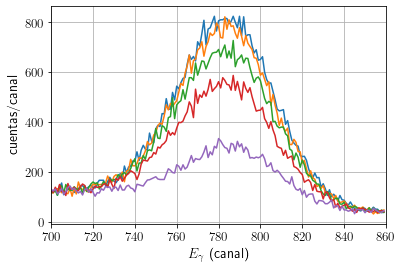

In [32]:
N=700
nf=860
plt.plot(data_arena_aire['canal'][N:nf], data_arena_aire['cuentas'][N:nf])
plt.plot(data_caja_arena_0['canal'][N:nf], data_caja_arena_0['cuentas'][N:nf])
plt.plot(data_caja_arena_1['canal'][N:nf], data_caja_arena_1['cuentas'][N:nf])
plt.plot(data_caja_arena_3['canal'][N:nf], data_caja_arena_3['cuentas'][N:nf])
plt.plot(data_caja_arena_9['canal'][N:nf], data_caja_arena_9['cuentas'][N:nf])
plt.xlim(700, 860)
plt.xlabel(r'$E_{\gamma}$ (canal)', fontsize=14)
plt.ylabel('cuentas/canal', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(np.arange(0,850,200),fontsize=13)
plt.grid()

In [108]:
def func(x,M, m, s, b0, b1):
    return M*np.exp(-0.5*((x-m)/s)**2)+b0+b1*(x-m)
# aire 
popt0, pcov0 = curve_fit(func, data_arena_aire['canal'][N:nf], data_arena_aire['cuentas'][N:nf], p0=[708, 790, 22, 92, -0.31])
perr0 = np.sqrt(np.diag(pcov0))
# caja 
popt1, pcov1 = curve_fit(func, data_caja_arena_0['canal'][N:nf], data_caja_arena_0['cuentas'][N:nf], p0=[708, 790, 22, 92, -0.31])
perr1 = np.sqrt(np.diag(pcov1))
# 1 
popt2, pcov2 = curve_fit(func, data_caja_arena_1['canal'][N:nf], data_caja_arena_1['cuentas'][N:nf], p0=[608, 790, 21, 92, -0.31])
perr2 = np.sqrt(np.diag(pcov2))
# 3 
popt3, pcov3 = curve_fit(func, data_caja_arena_3['canal'][N:nf], data_caja_arena_3['cuentas'][N:nf], p0=[458, 790, 25, 92, -0.31])
perr3 = np.sqrt(np.diag(pcov3))
# 9 
popt4, pcov4 = curve_fit(func, data_caja_arena_9['canal'][N:nf], data_caja_arena_9['cuentas'][N:nf], p0=[208, 790, 22, 92, -0.31])
perr4 = np.sqrt(np.diag(pcov4))

print(popt4)


[ 2.21741556e+02  7.85412586e+02  2.23531504e+01  8.05712212e+01
 -6.33867287e-01]


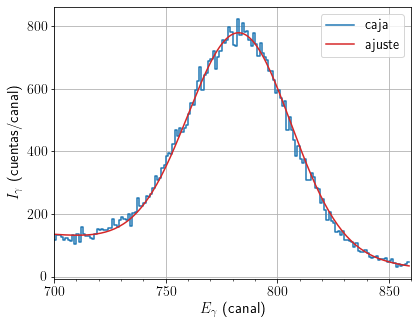

In [162]:
fig, ax = plt.subplots(figsize=[6.4, 5.0])

plt.step(data_caja_arena_0['canal'][N:nf], data_caja_arena_0['cuentas'][N:nf], label='caja')
plt.plot(data_caja_arena_0['canal'][N:nf], func(data_caja_arena_0['canal'][N:nf], *popt1), 'tab:red', label='ajuste')

'''
plt.step(data_arena_aire['canal'][N:nf], data_arena_aire['cuentas'][N:nf])
plt.plot(data_arena_aire['canal'][N:nf], func(data_arena_aire['canal'][N:nf], *popt0), 'tab:red', label='ajuste')
plt.plot(data_caja_arena_0['canal'][N:nf], data_caja_arena_0['cuentas'][N:nf], 'tab:green')
plt.plot(data_caja_arena_0['canal'][N:nf], func(data_caja_arena_0['canal'][N:nf], *popt1), 'tab:green')
plt.plot(data_caja_arena_1['canal'][N:nf], data_caja_arena_1['cuentas'][N:nf], 'tab:purple')
plt.plot(data_caja_arena_1['canal'][N:nf], func(data_caja_arena_1['canal'][N:nf], *popt2), 'tab:purple')
plt.plot(data_caja_arena_3['canal'][N:nf], data_caja_arena_3['cuentas'][N:nf], 'tab:pink')
plt.plot(data_caja_arena_3['canal'][N:nf], func(data_caja_arena_3['canal'][N:nf], *popt3), 'tab:pink')
plt.plot(data_caja_arena_9['canal'][N:nf], data_caja_arena_9['cuentas'][N:nf], 'tab:olive')
plt.plot(data_caja_arena_9['canal'][N:nf], func(data_caja_arena_9['canal'][N:nf], *popt4),'tab:olive')
'''
plt.xlim(700, 860)
plt.xlabel(r'$E_{\gamma}$ (canal)', fontsize=15)
plt.ylabel(r'$I_{\gamma}$ (cuentas/canal)', fontsize=15)
plt.xticks(fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
plt.yticks(np.arange(0,850,200),fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.savefig('arena_caja.pdf')

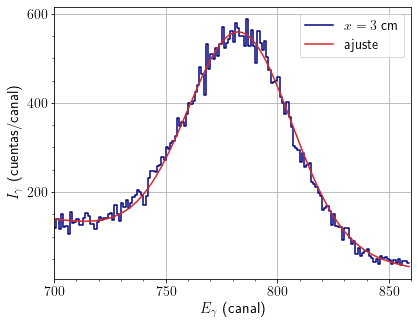

In [105]:
fig, ax = plt.subplots(figsize=[6.4, 5.0])

plt.step(data_caja_arena_3['canal'][N:nf], data_caja_arena_3['cuentas'][N:nf], label=r'$x=3$ cm', color='navy')
plt.plot(data_caja_arena_3['canal'][N:nf], func(data_caja_arena_3['canal'][N:nf], popt3[0], popt3[1], popt3[2],popt3[3],popt3[4]), 'tab:red', label='ajuste')
plt.xlim(700, 860)
plt.xlabel(r'$E_{\gamma}$ (canal)', fontsize=15)
plt.ylabel(r'$I_{\gamma}$ (cuentas/canal)', fontsize=15)
plt.xticks(fontsize=14)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(50))
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.savefig('arena_3.pdf')

In [109]:
# Amplitud M
print(popt0[0], perr0[0])
print(popt1[0], perr1[0])
print(popt2[0], perr2[0])
print(popt3[0], perr3[0])
print(popt4[0], perr4[0])

733.7610132190655 4.123044115236138
699.098074808127 4.08838421235884
605.3884380080784 3.9777827425710384
476.8266173587765 3.689191154213202
221.7415555211251 2.789045396692219


In [110]:
# Sigmas
print(popt0[2], perr0[2])
print(popt1[2], perr1[2])
print(popt2[2], perr2[2])
print(popt3[2], perr3[2])
print(popt4[2], perr4[2])


23.116252886320687 0.18355752668019434
23.020443016701734 0.18993437497480783
23.3386729676167 0.21733595255709245
23.15154025103876 0.25321593610799215
22.353150421332128 0.3937336377556333


In [107]:
#Intensidades 
I_aire = np.sqrt(2*np.pi)*popt0[0]*popt0[2]
I_caja = np.sqrt(2*np.pi)*popt1[0]*popt1[2]
I_1 = np.sqrt(2*np.pi)*popt2[0]*popt2[2]
I_3 = np.sqrt(2*np.pi)*popt3[0]*popt3[2]
I_9 = np.sqrt(2*np.pi)*popt4[0]*popt4[2]

DI_aire = np.sqrt(2*np.pi)*np.sqrt((perr0[0]*popt0[2])**2+(perr0[2]*popt0[0])**2)
DI_caja = np.sqrt(2*np.pi)*np.sqrt((perr1[0]*popt1[2])**2+(perr1[2]*popt1[0])**2)
DI_1 = np.sqrt(2*np.pi)*np.sqrt((perr2[0]*popt2[2])**2+(perr2[2]*popt2[0])**2)
DI_3 = np.sqrt(2*np.pi)*np.sqrt((perr3[0]*popt3[2])**2+(perr3[2]*popt3[0])**2)
DI_9 = np.sqrt(2*np.pi)*np.sqrt((perr4[0]*popt4[2])**2+(perr4[2]*popt4[0])**2)

print('aire', I_aire, DI_aire)
print('caja', I_caja, DI_caja)
print('1', I_1, DI_1)
print('3', I_3, DI_3)
print('9', I_9, DI_9)

aire 42516.940351940444 413.59026644966366
caja 40340.54093743175 407.96605348549815
1 35416.05757812803 403.63660633978293
3 27671.34787879637 370.7193696233549
9 12424.409717205994 268.914600039561


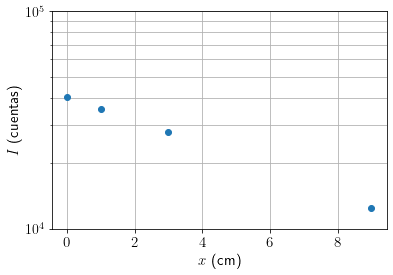

In [165]:
x = np.array([0.0, 1.0, 3.0, 9.0])
I = np.array([I_caja, I_1, I_3, I_9])
DI = np.array([DI_caja, DI_1, DI_3, DI_9])
fig, ax = plt.subplots()
plt.errorbar(x, I, yerr=DI, fmt='o')
plt.xlabel(r'$x$ (cm)', fontsize=15)
plt.ylabel(r'$I$ (cuentas)', fontsize=15)
plt.yscale('log', subs=[])
plt.ylim(1e4, 8e4)
plt.xticks(fontsize=15)
plt.yticks([1e4, 1e5], fontsize=14)
ax.yaxis.set_minor_locator(MultipleLocator(10000))
plt.grid(which='both')


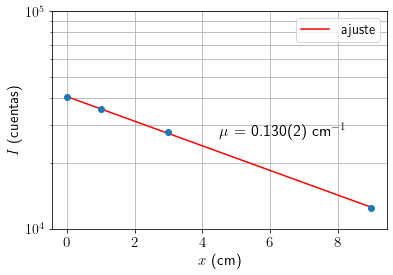

In [188]:
def Iexp(x,I0, m):
    return I0*np.exp(-m*x)


popt_I, pcov_I = curve_fit(Iexp, x, I, p0=[4e4,1.0], sigma=DI)

fig, ax = plt.subplots()
plt.errorbar(x, I, yerr=DI, fmt='o', markersize=6)
plt.plot(x, Iexp(x, *popt_I), 'r', label='ajuste')
plt.text(4.5, 2.7e4,r'$\mu$ = 0.130(2) cm$^{-1}$', fontsize=16)
plt.xlabel(r'$x$ (cm)', fontsize=15)
plt.ylabel(r'$I$ (cuentas)', fontsize=15)
plt.yscale('log', subs=[])
plt.ylim(1e4, 8e4)
plt.xticks(fontsize=15)
plt.yticks([1e4, 1e5], fontsize=14)
ax.yaxis.set_minor_locator(MultipleLocator(10000))
plt.grid(which='both')
plt.legend(fontsize=14)
plt.savefig('Intensidad_x.pdf')


In [177]:
# Coneficiente de atenuacion 
perr_I = np.sqrt(np.diag(pcov_I))
print(popt_I[1], perr_I[1])

0.1301866245239598 0.001734110355281335
